In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from setup import *
plt.rcParams.update({'font.size': 9})
%matplotlib inline

In [2]:
colors = {"laplace":"cornflowerblue", "tnorm":"mediumseagreen", "norm":"salmon", "poisson":"plum", 
          "norm_ens": "peru", "norm_homo":"gray"}
colors2 = {"laplace":"navy", "tnorm":"darkgreen", "norm":"red", "poisson":"purple", 
          "norm_ens": "saddlebrown", "norm_homo":"darkslategray"}
label = {"laplace":"LAP", "tnorm":"TG", "norm":"HetG", "poisson":"Pois", 
          "norm_ens": "GEns", "norm_homo":"HomoG"}

In [15]:
gcn_folder = "220405"
gat_folder = "220421"
homo_before_folder = '220519'
homo_after_folder = '220520'

result_file = "results.csv"


In [4]:
out_folder = 'final'

In [5]:
def plot(dfb):
    dfb.sort_values(by='val_nll_loss', inplace=True)
    plb = dfb.groupby(['Distribution','Model Type']).head(20)

    fig, ax = plt.subplots(1,1, figsize=(3,3))
    for d,p,m in zip(plb['Distribution'],plb['test_picp'], plb['test_mpiw']):
        ax.scatter(p,m, alpha=0.5, c = colors[d], s=20, zorder=0)
    for (d,t),g in dfb.groupby(['Distribution','Model Type']):
        ax.scatter(g['test_picp'].head(20).mean(), g['test_mpiw'].head(20).mean(), c=colors2[d], marker='x', 
                   s=75, zorder=100, label=label[d]+"-"+model_type)
    ax.legend()
    ax.grid()
    ax.set_xlabel("PICP")
    ax.set_ylabel("MPIW");

    return fig, ax

# GCN BEFORE

In [6]:
model_type='GCN'
df1 = pd.read_csv(project_dir+"results/"+gcn_folder+"_before/"+result_file)
df2 = pd.read_csv(project_dir+"results/"+homo_before_folder+"_before/"+result_file)
df1 = df1[df1['Distribution']!='norm_homo']
df2 = df2[df2['Model Type']==model_type]
dfb = pd.concat([df1, df2])

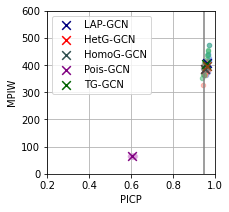

In [7]:
fig, ax = plot(dfb)
ax.scatter(0.962, 396.96, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)
ax.set_xlim([0.2, 1])
ax.set_ylim([0, 600])
ax.plot([0.95, 0.95], [0,600], c='gray');
fig.savefig(project_dir+"figures/"+out_folder+"/before_gcn_picp_mpiw_tradeoff.png", bbox_inches='tight')

# GCN AFTER

In [25]:
model_type='GCN'
df1 = pd.read_csv(project_dir+"results/"+gcn_folder+"_after/"+result_file)
df2 = pd.read_csv(project_dir+"results/"+homo_after_folder+"_after/"+result_file)
df1 = df1[df1['Distribution']!='norm_homo']
df2 = df2[df2['Model Type']==model_type]
dfa = pd.concat([df1, df2])

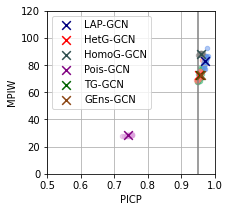

In [26]:
fig, ax = plot(dfa)
ax.scatter(0.958, 73.04, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)

ax.set_xlim([0.5, 1])
ax.set_ylim([0, 120])
ax.plot([0.95, 0.95], [0,120], c='gray')
ax.legend()
# ax.grid()
ax.set_xlabel("PICP")
ax.set_ylabel("MPIW");
fig.savefig(project_dir+"figures/"+out_folder+"/after_gcn_picp_mpiw_tradeoff.png", bbox_inches='tight')


# GAT BEFORE

In [10]:
model_type='GAT'
df1 = pd.read_csv(project_dir+"results/"+gcn_folder+"_before/"+result_file)
df2 = pd.read_csv(project_dir+"results/"+homo_before_folder+"_before/"+result_file)
df1 = df1[df1['Distribution']!='norm_homo']
df2 = df2[df2['Model Type']==model_type]
dfb = pd.concat([df1, df2])

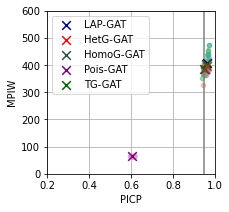

In [11]:
fig, ax = plot(dfb)
ax.scatter(0.962, 396.96, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)
ax.set_xlim([0.2, 1])
ax.set_ylim([0, 600])
ax.plot([0.95, 0.95], [0,600], c='gray');
fig.savefig(project_dir+"figures/"+out_folder+"/before_gat_picp_mpiw_tradeoff.png", bbox_inches='tight')

# GAT AFTER

In [23]:
model_type='GAT'
df1 = pd.read_csv(project_dir+"results/"+gcn_folder+"_after/"+result_file)
df2 = pd.read_csv(project_dir+"results/"+homo_after_folder+"_after/"+result_file)
df1 = df1[df1['Distribution']!='norm_homo']
df2 = df2[df2['Model Type']==model_type]
dfa = pd.concat([df1, df2])

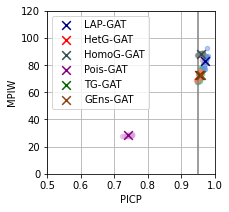

In [24]:
fig, ax = plot(dfa)
ax.scatter(0.958, 73.04, c=colors2['norm_ens'], marker='x', 
               s=75, zorder=100, label=label['norm_ens']+"-"+model_type)

ax.set_xlim([0.5, 1])
ax.set_ylim([0, 120])
ax.plot([0.95, 0.95], [0,120], c='gray')
ax.legend()
# ax.grid()
ax.set_xlabel("PICP")
ax.set_ylabel("MPIW");
fig.savefig(project_dir+"figures/"+out_folder+"/after_gat_picp_mpiw_tradeoff.png", bbox_inches='tight')
